In [2]:
import bs4
import requests
import re
import pprint
import pandas as pd

In [3]:
BASE_URL = 'https://www.google.com/'

In [4]:
response = requests.get(BASE_URL+"search?q={tesla}&tbm=nws")

In [5]:
soup = bs4.BeautifulSoup(response.content, features="html.parser")

<!DOCTYPE html>
<html lang="en-IN">
 <head>
  <meta charset="utf-8"/>
  <meta content="AuGja1tZnula8g99g84tXdYpnTOYY3dZDWwPGrQlieoc5O2XUK43BBV9fkFZ+xa73I8tnEUcdTsA+qiYLKtuggkAAABxeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jby5pbjo0NDMiLCJmZWF0dXJlIjoiTG9uZ0FuaW1hdGlvbkZyYW1lVGltaW5nIiwiZXhwaXJ5IjoxNzA5NjgzMTk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   {tesla} - Google Search
  </title>
  <script nonce="9bS2PWnhXLRW6L-DXDhtOA">
   (function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!
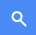
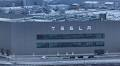
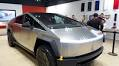
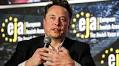
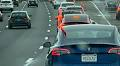
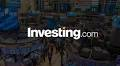

In [6]:
with open('index.html', 'w') as f:
    print(soup.prettify())
    f.write(soup.prettify())

In [7]:
[(element.get('href'), element.select('h3>div')[0].text, list(element.children)) for element in soup.select("div>a") if str(element.text).endswith('ago')]

[('/url?q=https://www.reuters.com/business/autos-transportation/tesla-plans-build-new-electric-vehicles-mid-2025-sources-2024-01-24/&sa=U&ved=2ahUKEwjQnpGhx_WDAxWVD7kGHSjFCLAQxfQBegQIARAC&usg=AOvVaw1kLRYldQWv_TGfC9ej_NAW',
  'Exclusive: Tesla plans to build new electric vehicles in mid-2025',
  [<div class="am3QBf"><div><span><h3 class="zBAuLc l97dzf"><div class="BNeawe deIvCb AP7Wnd"><span class="rQMQod Xb5VRe">Exclusive: Tesla plans to build new electric vehicles in mid-2025</span></div></h3></span><span><div class="BNeawe s3v9rd AP7Wnd"><span class="rQMQod aJyiOc">Reuters</span> · <span class="r0bn4c rQMQod">6 hours ago</span></div></span></div></div>]),
 ('/url?q=https://www.ndtv.com/world-news/elon-musks-tesla-plans-to-build-new-electric-vehicles-in-2025-report-4921817&sa=U&ved=2ahUKEwjQnpGhx_WDAxWVD7kGHSjFCLAQxfQBegQIARAF&usg=AOvVaw2sDyY6rC6wRbSme-hQjz5O',
  "Elon Musk's Tesla Plans To Build New Electric Vehicles In 2025: Report",
  [<div class="am3QBf"><div><span><h3 class="zBAu

In [34]:
all_news = []
NUMBER_PAGE = 5
next_link = "*****"
for i in range(NUMBER_PAGE):
    if next_link == "*****":
        response = requests.get(BASE_URL+"search?q={tesla}&tbm=nws")
        soup = bs4.BeautifulSoup(response.content, features="html.parser")
        next_link = [element for element in soup.find_all('a') if 'Next' in str(element.text)][0].get('href')
        print(next_link)
    else:
        response = requests.get(BASE_URL+next_link)
        soup = bs4.BeautifulSoup(response.content, features="html.parser")
        next_link = [element for element in soup.find_all('a') if element.get('aria-label') == 'Next page'][0].get('href')
        print(next_link)
    for element in soup.select("div>a"):
        if str(element.text).endswith('ago'):
            news = {}
            news['link'] = element.get('href')
            news['title'] = element.select('h3>div')[0].text
            print(element.get('href'), element.select('h3>div')[0].text)
            for child in element.children:
                ele = child.select("div>div")
                if len(ele) == 4:
                    news['source'] = child.select("div>div")[3].text
                    news['timestamp'] = element.select('span')[0].text
                    pprint.pprint(child.select("div>div")[3].text)
                    pprint.pprint(element.select('span')[0].text)
                    break
                else:
                    if len(ele[0].select('span')) == 5:
                        news['source'] = ele[0].select('span')[3].text
                        news['timestamp'] = ele[0].select('span')[4].text
                        pprint.pprint(ele[0].select('span')[3].text)
                        pprint.pprint(ele[0].select('span')[4].text)
            all_news.append(news)

/search?q=%7Btesla%7D&sca_esv=601029419&ie=UTF-8&tbm=nws&ei=c9ewZcPOA83X1sQPofezYA&start=10&sa=N
/url?q=https://www.reuters.com/business/autos-transportation/tesla-plans-build-new-electric-vehicles-mid-2025-sources-2024-01-24/&sa=U&ved=2ahUKEwiD1P2b2vWDAxXNq5UCHaH7DAwQxfQBegQIABAC&usg=AOvVaw3m7rCA714xzfLt4dAtev8x Exclusive: Tesla plans to build new electric vehicles in mid-2025
'Reuters'
'5 hours ago'
/url?q=https://www.ndtv.com/world-news/elon-musks-tesla-plans-to-build-new-electric-vehicles-in-2025-report-4921817&sa=U&ved=2ahUKEwiD1P2b2vWDAxXNq5UCHaH7DAwQxfQBegQIABAF&usg=AOvVaw1iXvzZy9Edlk5a92KDPyFA Elon Musk's Tesla Plans To Build New Electric Vehicles In 2025: Report
'NDTV'
'3 hours ago'
/url?q=https://www.cnbc.com/2024/01/24/chinas-ev-players-ramp-up-competition-with-tesla-using-new-technology.html&sa=U&ved=2ahUKEwiD1P2b2vWDAxXNq5UCHaH7DAwQxfQBegQIABAI&usg=AOvVaw2tOifydKOFNaMKnPXRd7w9 China’s EV players ramp up competition with Tesla using new tech
'CNBC'
'5 hours ago'
/url?q=http

In [35]:
all_news

[{'link': '/url?q=https://www.reuters.com/business/autos-transportation/tesla-plans-build-new-electric-vehicles-mid-2025-sources-2024-01-24/&sa=U&ved=2ahUKEwiD1P2b2vWDAxXNq5UCHaH7DAwQxfQBegQIABAC&usg=AOvVaw3m7rCA714xzfLt4dAtev8x',
  'title': 'Exclusive: Tesla plans to build new electric vehicles in mid-2025',
  'source': 'Reuters',
  'timestamp': '5 hours ago'},
 {'link': '/url?q=https://www.ndtv.com/world-news/elon-musks-tesla-plans-to-build-new-electric-vehicles-in-2025-report-4921817&sa=U&ved=2ahUKEwiD1P2b2vWDAxXNq5UCHaH7DAwQxfQBegQIABAF&usg=AOvVaw1iXvzZy9Edlk5a92KDPyFA',
  'title': "Elon Musk's Tesla Plans To Build New Electric Vehicles In 2025: Report",
  'source': 'NDTV',
  'timestamp': '3 hours ago'},
 {'link': '/url?q=https://www.cnbc.com/2024/01/24/chinas-ev-players-ramp-up-competition-with-tesla-using-new-technology.html&sa=U&ved=2ahUKEwiD1P2b2vWDAxXNq5UCHaH7DAwQxfQBegQIABAI&usg=AOvVaw2tOifydKOFNaMKnPXRd7w9',
  'title': 'China’s EV players ramp up competition with Tesla using

In [37]:
final_df = pd.DataFrame(all_news)

In [38]:
final_df

,link,title,source,timestamp
0,/url?q=https://www.reuters.com/business/autos-...,Exclusive: Tesla plans to build new electric v...,Reuters,5 hours ago
1,/url?q=https://www.ndtv.com/world-news/elon-mu...,Elon Musk's Tesla Plans To Build New Electric ...,NDTV,3 hours ago
2,/url?q=https://www.cnbc.com/2024/01/24/chinas-...,China’s EV players ramp up competition with Te...,CNBC,5 hours ago
3,/url?q=https://www.moneycontrol.com/news/busin...,MC Exclusive: Tesla may skip India’s first glo...,Moneycontrol,17 mins ago
4,/url?q=https://brandequity.economictimes.india...,"Tesla price cuts, delivery plan and CEO pay in...",BrandEquity,23 hours ago
5,/url?q=https://www.livemint.com/auto-news/why-...,Why it makes sense for new EV drivers to look ...,Mint,20 hours ago
6,/url?q=https://www.cnbctv18.com/auto/tesla-cyb...,Tesla Cybertruck to go on tour in China to bur...,CNBC TV18,4 hours ago
7,/url?q=https://www.investing.com/analysis/tesl...,Tesla: Should You Buy or Sell Before Q4 Earnin...,Investing.com,2 hours ago
8,/url?q=https://finance.yahoo.com/news/tesla-q4...,Tesla Q4 earnings preview: New delivery target...,Yahoo Finance,17 hours ago
9,/url?q=https://fortune.com/2024/01/23/elon-mus...,Elon Musk promised Tesla’s very own ‘ChatGPT m...,Fortune,20 hours ago


In [41]:
final_df.duplicated().any()

False